In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Desktop/Data/bank.csv", sep=";")

In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
def replace_marital (val):
    if val == "single":
        return 0
    else:
        return 1
df["marital"] = df["marital"].apply(replace_marital,1)

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
df["housing"] = df["housing"].map({
    "no":0,
    "yes":1
}.get)

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
df["loan"] = df["loan"].replace({
    "no":0,
    "yes":1
})

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,1,secondary,no,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,1,tertiary,yes,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,1,secondary,no,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,1,secondary,no,1137,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,0,tertiary,no,1136,1,1,cellular,3,apr,345,2,249,7,other,no


In [12]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [13]:
df["job"].replace({
    'unknown':np.nan,
    'management':0,
    'technician':1,
    'entrepreneur':2,
    'blue-collar':3,
    'retired':4,
    'admin.':5,
    'services':6,
    'self-employed':7,
    'unemployed':8,
    'housemaid':9,
    'student':10
},inplace=True)

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,secondary,no,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,7.0,1,tertiary,yes,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1.0,1,secondary,no,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,secondary,no,1137,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,2.0,0,tertiary,no,1136,1,1,cellular,3,apr,345,2,249,7,other,no


In [16]:
df["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [17]:
df["education"].replace({
    'unknown':np.nan,
    'tertiary':0,
    'secondary':1,
    'primary':2
},inplace=True)

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [19]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,no,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,7.0,1,0.0,yes,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1.0,1,1.0,no,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,no,1137,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,2.0,0,0.0,no,1136,1,1,cellular,3,apr,345,2,249,7,other,no


In [20]:
df["default"].replace({
    "no":0,
    "yes":1
},inplace=True)

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [22]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,7.0,1,0.0,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1.0,1,1.0,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,0,1137,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,2.0,0,0.0,0,1136,1,1,cellular,3,apr,345,2,249,7,other,no


In [23]:
df["balance"].max()

71188

In [24]:
df["balance"].min()

-3313

In [25]:
df["balance"] = df["balance"].apply(lambda v: (v - df["balance"].min()) / (df["balance"].max() - df["balance"].min()))

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [27]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,0.039999,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,7.0,1,0.0,1,0.000000,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1.0,1,1.0,0,0.048429,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,0,0.059731,0,0,cellular,6,feb,129,4,211,3,other,no
4520,44,2.0,0,0.0,0,0.059717,1,1,cellular,3,apr,345,2,249,7,other,no


In [28]:
#practical example of 4520
1136-(-3313)
71188 -(-3313)
4449 /  74501

0.05971731923061435

In [29]:
df.contact.replace({'unknown':np.nan,
            'telephone':0,
            'cellular':1},inplace=True)

In [30]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,may,226,1,-1,0,unknown,no


In [31]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,0.039999,1,0,1.0,30,jul,329,5,-1,0,unknown,no
4517,57,7.0,1,0.0,1,0.000000,1,1,NaN,9,may,153,1,-1,0,unknown,no
4518,57,1.0,1,1.0,0,0.048429,0,0,1.0,19,aug,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,0,0.059731,0,0,1.0,6,feb,129,4,211,3,other,no
4520,44,2.0,0,0.0,0,0.059717,1,1,1.0,3,apr,345,2,249,7,other,no


In [32]:
df.contact.unique()

array([ 1., nan,  0.])

In [33]:
df.month.unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [34]:
df.month = df.month.map({
  'oct':10 ,'may':5, 'apr':4, 'jun':6, 'feb':2,'aug':8, 'jan':1, 'jul':7, 'nov':11,
  'sep':9, 'mar':3,'dec':12
})

In [35]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,unknown,no


In [36]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,0.039999,1,0,1.0,30,7,329,5,-1,0,unknown,no
4517,57,7.0,1,0.0,1,0.000000,1,1,NaN,9,5,153,1,-1,0,unknown,no
4518,57,1.0,1,1.0,0,0.048429,0,0,1.0,19,8,151,11,-1,0,unknown,no
4519,28,3.0,1,1.0,0,0.059731,0,0,1.0,6,2,129,4,211,3,other,no
4520,44,2.0,0,0.0,0,0.059717,1,1,1.0,3,4,345,2,249,7,other,no


In [37]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [38]:
df.poutcome = df.poutcome.map({
    'unknown':np.nan,
    'failure':0,
    'other':1,
    'success':2
})

In [39]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,NaN,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,0.0,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,0.0,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,NaN,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,NaN,no


In [40]:
df.pdays = df.pdays.apply(lambda v: (v - df.pdays.min()) / (df.pdays.max() - df.pdays.min()))

In [41]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,0.000000,0,NaN,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,0.389908,4,0.0,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,0.379587,1,0.0,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,no


In [42]:
df.y.replace({'no':0,'yes':1}, inplace=True)

In [43]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,0.000000,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,0.389908,4,0.0,0
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,0.379587,1,0.0,0
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,0


In [44]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,6.0,1,1.0,0,0.039999,1,0,1.0,30,7,329,5,0.000000,0,NaN,0
4517,57,7.0,1,0.0,1,0.000000,1,1,NaN,9,5,153,1,0.000000,0,NaN,0
4518,57,1.0,1,1.0,0,0.048429,0,0,1.0,19,8,151,11,0.000000,0,NaN,0
4519,28,3.0,1,1.0,0,0.059731,0,0,1.0,6,2,129,4,0.243119,3,1.0,0
4520,44,2.0,0,0.0,0,0.059717,1,1,1.0,3,4,345,2,0.286697,7,1.0,0


In [45]:
df.y.unique()

array([0, 1], dtype=int64)

In [46]:
df.duration = df.duration.apply(lambda v: (v - df.duration.min()) / (df.duration.max() - df.duration.min()))

In [47]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [48]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,3.102164,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,10.576211,2.675571,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,5.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,87.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [49]:
df.to_csv("Desktop/preprocessed.csv", index = False)

In [5]:
new_df = pd.read_csv("Desktop/Data/bank_preprocessed.csv")

In [6]:
new_df.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33.0,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35.0,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30.0,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59.0,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [7]:
new_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.022599,0.400202,0.183531,-0.012006,0.076988,-0.175128,0.002801,-0.160736,-0.020278,0.073971,-0.019929,-0.002761,-0.020031,-0.020426,0.025319,0.016912
job,0.022599,1.000000,-0.004633,0.329417,-0.000494,-0.027549,-0.031556,-0.000807,-0.071647,-0.013250,-0.066394,0.010792,-0.019756,-0.010806,0.002621,0.050381,0.005100
marital,0.400202,-0.004633,1.000000,0.169967,-0.007391,-0.007525,0.041449,0.048496,-0.056938,-0.006769,0.061882,-0.024560,0.008093,-0.020693,-0.035558,-0.009813,-0.045815
education,0.183531,0.329417,0.169967,1.000000,0.011623,-0.056585,0.072716,0.024752,-0.117748,-0.017107,-0.083234,0.011193,-0.009714,-0.011531,-0.030396,-0.023715,-0.055368
default,-0.012006,-0.000494,-0.007391,0.011623,1.000000,-0.070886,0.006881,0.063994,0.023372,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,-0.026656,0.025369,0.001303
balance,0.076988,-0.027549,-0.007525,-0.056585,-0.070886,1.000000,-0.050227,-0.071349,-0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,0.020393,0.017905
housing,-0.175128,-0.031556,0.041449,0.072716,0.006881,-0.050227,1.000000,0.018451,0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.253137,-0.104683
loan,0.002801,-0.000807,0.048496,0.024752,0.063994,-0.071349,0.018451,1.000000,0.007166,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,-0.096067,-0.070517
contact,-0.160736,-0.071647,-0.056938,-0.117748,0.023372,-0.036326,0.046484,0.007166,1.000000,-0.055509,0.014321,0.027292,-0.033973,0.024204,0.001642,-0.037807,-0.002108
day,-0.020278,-0.013250,-0.006769,-0.017107,-0.013261,-0.008677,-0.031291,-0.004879,-0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.019975,-0.011244


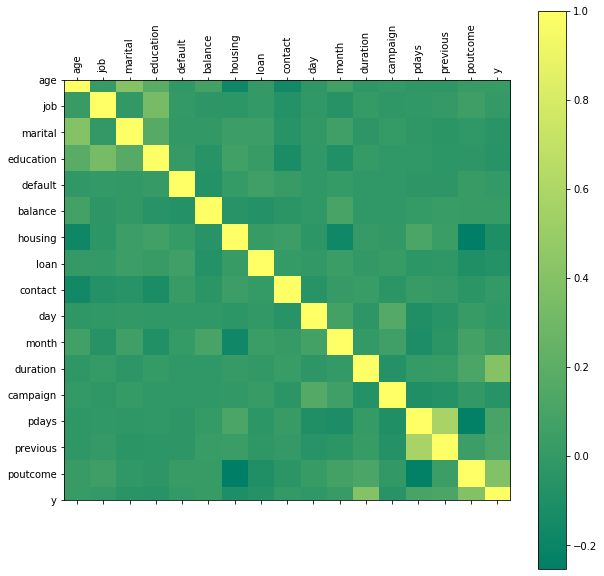

In [8]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.matshow(new_df.corr(), cmap = "summer")
plt.colorbar()

plt.xticks(list(range(len(new_df.columns))), new_df.columns, rotation = "vertical" )
plt.yticks(list(range(len(new_df.columns))), new_df.columns, rotation = "horizontal" ) 

plt.show()

In [9]:
new_df.corr()["y"].sort_values(ascending = False)

y            1.000000
duration     0.401118
poutcome     0.396350
previous     0.116714
pdays        0.104087
month        0.023335
balance      0.017905
age          0.016912
job          0.005100
default      0.001303
contact     -0.002108
day         -0.011244
marital     -0.045815
education   -0.055368
campaign    -0.061147
loan        -0.070517
housing     -0.104683
Name: y, dtype: float64

([<matplotlib.axis.XTick at 0x150336b5808>,
 <a list of 17 Text xticklabel objects>)

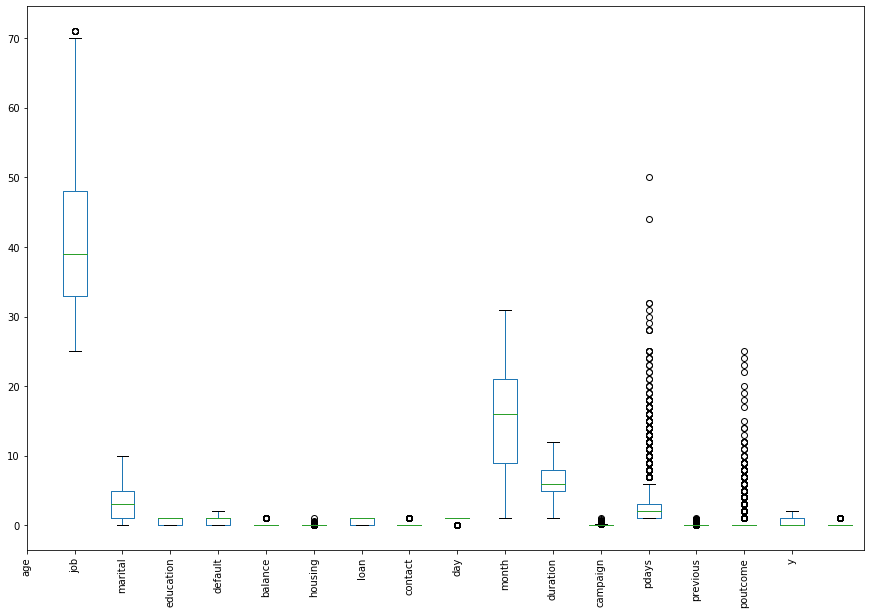

In [10]:
new_df.plot.box()
plt.xticks(list(range(len(new_df.columns))), new_df.columns, rotation = "vertical" )

C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x150333bf988>,
 'caps': [<matplotlib.lines.Line2D at 0x150333c7b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x150333cc648>],
 'medians': [<matplotlib.lines.Line2D at 0x150336591c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x150333d6548>],
 'means': []}

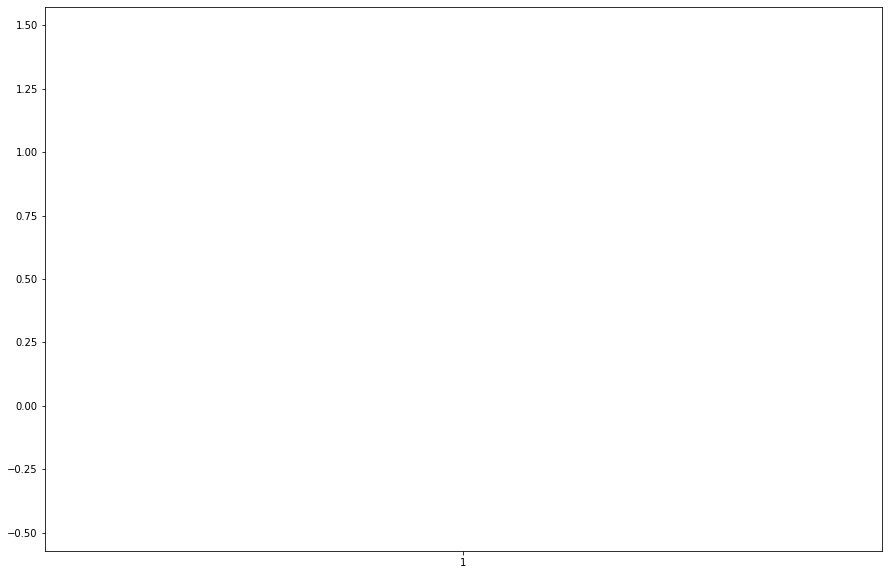

In [11]:
plt.boxplot(new_df.age)

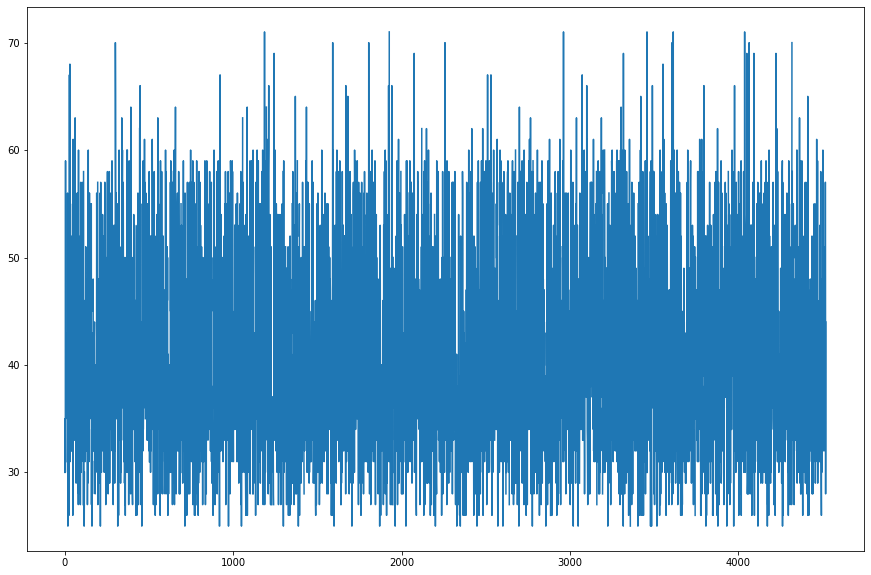

In [12]:
plt.plot(new_df.age.values)

C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Mohammad Reza Jalali\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([415., 990., 688., 663., 444., 504., 420., 219.,  37.,  26.]),
 array([25. , 29.6, 34.2, 38.8, 43.4, 48. , 52.6, 57.2, 61.8, 66.4, 71. ]),
 <a list of 10 Patch objects>)

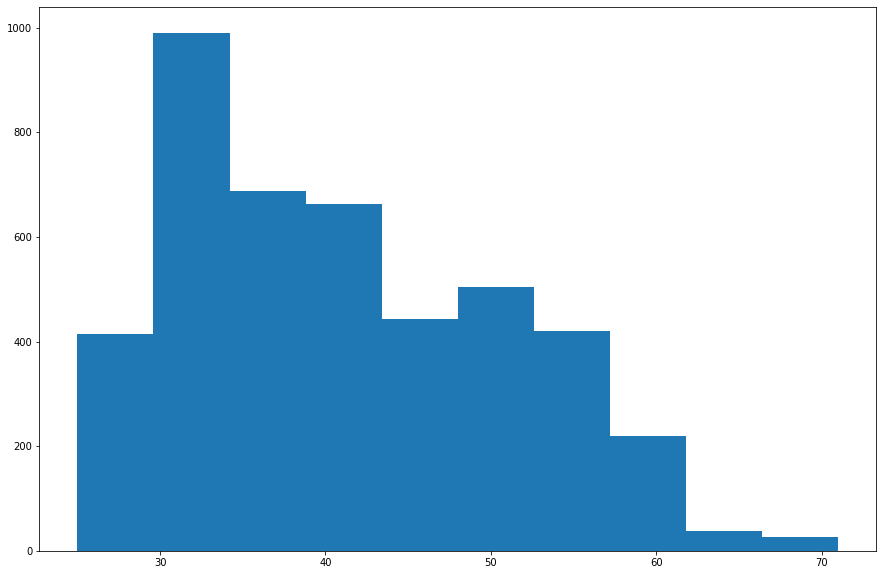

In [13]:
plt.hist(new_df.age.values)

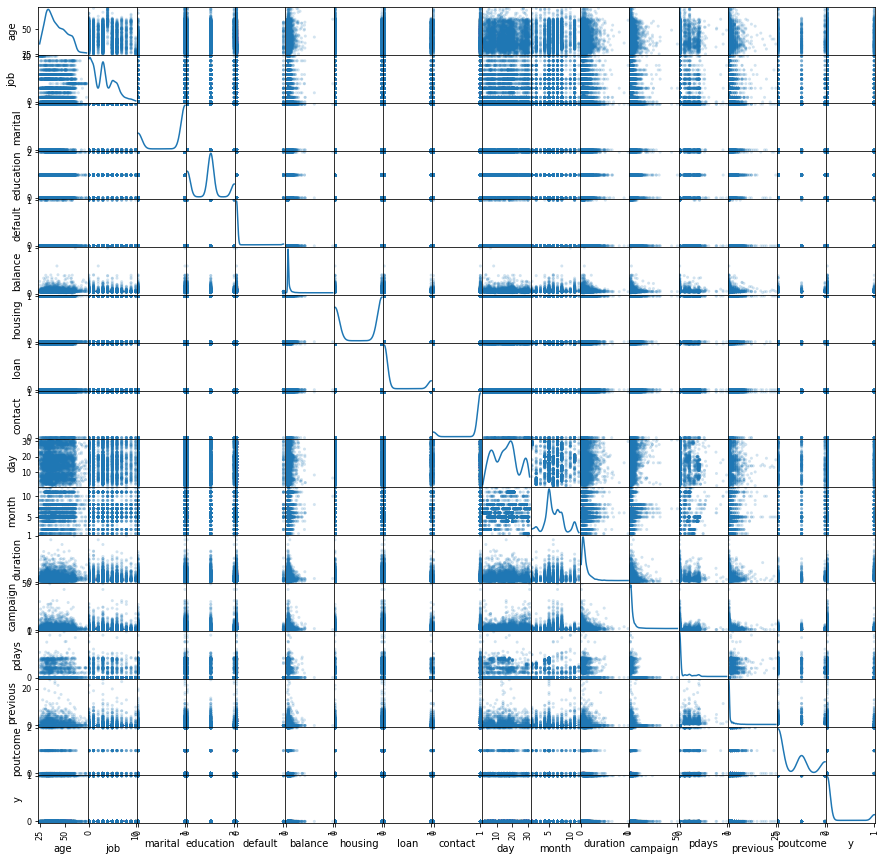

In [14]:
pd.plotting.scatter_matrix(new_df , alpha = 0.2 , figsize=(15,15), diagonal = "kde")
plt.show()

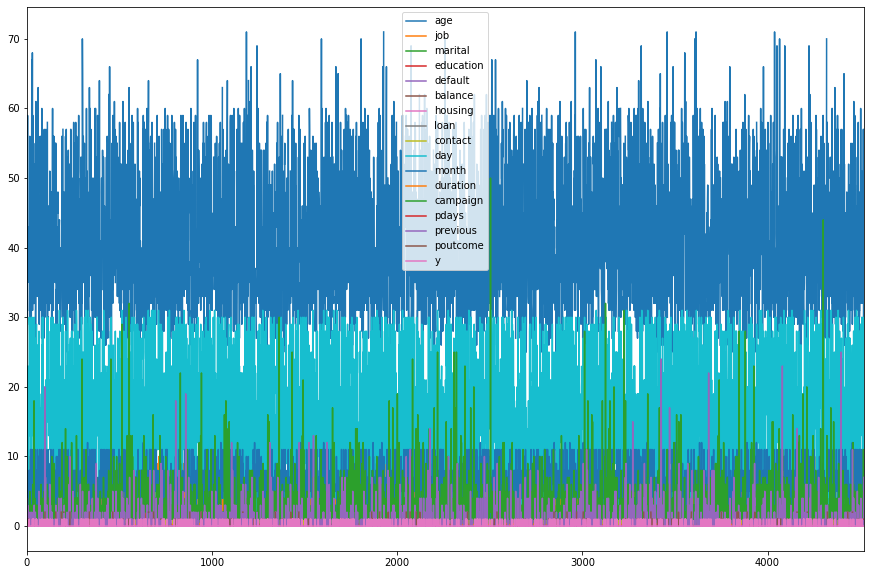

In [15]:
new_df.plot()

In [16]:
low = 0.01
high = 0.99
new_df.quantile([low, high])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0.01,26.0,0.0,0.0,0.0,0.0,0.035457,0.0,0.0,0.0,2.0,1.0,0.002052,1.0,0.000000,0.0,0.0,0.0
0.99,64.0,10.0,1.0,2.0,1.0,0.234998,1.0,1.0,1.0,31.0,11.0,0.415425,16.0,0.425459,8.0,2.0,1.0


In [17]:
gdf = new_df.quantile([low, high])

In [18]:
gdf.age

0.01    26.0
0.99    64.0
Name: age, dtype: float64

In [19]:
new_df.age = new_df.age.apply(lambda v : v if gdf.age[low] < v < gdf.age[high] else np.nan)

In [20]:
new_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4237.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.200378,3.102164,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,9.174534,2.675571,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,5.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,63.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [21]:
new_df.age.dropna(inplace = True)

In [22]:
new_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4237.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.200378,3.102164,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,9.174534,2.675571,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,5.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,63.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [23]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33.0,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35.0,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30.0,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59.0,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [24]:
new_df.age.unique()

array([30., 33., 35., 59., 36., 39., 41., 43., 31., 40., 56., 37., 38.,
       42., 44., 55., 53., 32., 49., 52., 34., 61., 45., 48., 57., 54.,
       63., 51., 29., 50., 27., 60., 28., 58., 46., 47., 62.])

{'whiskers': [<matplotlib.lines.Line2D at 0x1503f4adb48>,
 'caps': [<matplotlib.lines.Line2D at 0x1503f4a8bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1503f4a8408>],
 'medians': [<matplotlib.lines.Line2D at 0x1503f4a5fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1503f4a5c48>],
 'means': []}

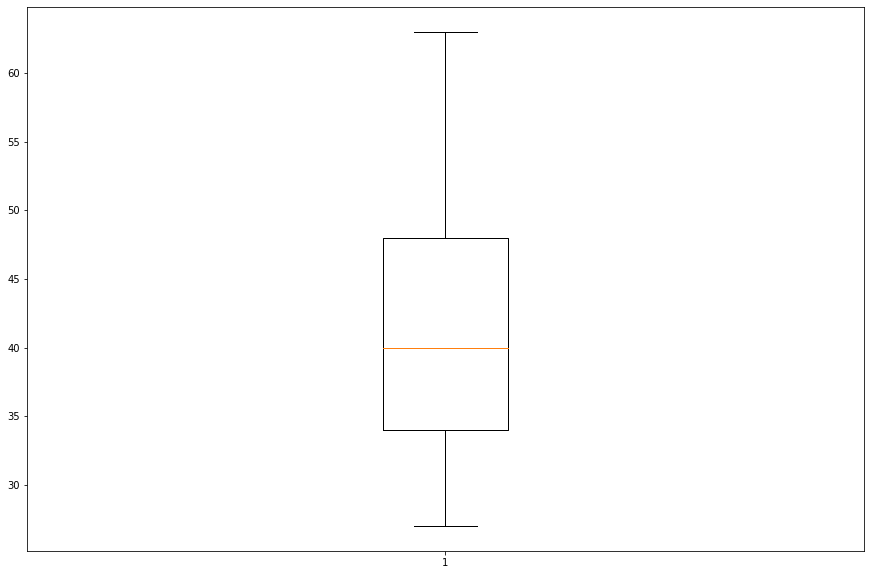

In [25]:
plt.boxplot(new_df.age)

In [26]:
new_df.cov()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,84.172068,1.024221,1.508639,1.156199,-0.003547,0.021220,-0.734638,0.060517,-0.394366,-0.265626,1.676793,-0.025382,0.324012,-0.033001,-0.458938,0.139849,0.019695
job,1.024221,7.158681,-0.005472,0.583008,-0.000171,-0.002985,-0.041797,-0.000779,-0.057406,-0.291942,-0.421821,0.002488,-0.164752,-0.003313,0.011899,0.102526,0.004348
marital,1.508639,-0.005472,0.194603,0.050009,-0.000419,-0.000134,0.009063,0.007699,-0.007486,-0.024628,0.064926,-0.000932,0.011102,-0.001048,-0.026565,-0.003355,-0.006454
education,1.156199,0.583008,0.050009,0.443989,0.000997,-0.001524,0.023981,0.006013,-0.022508,-0.093661,-0.131709,0.000643,-0.020258,-0.000881,-0.034476,-0.011456,-0.011808
default,-0.003547,-0.000171,-0.000419,0.000997,0.016532,-0.000368,0.000439,0.002961,0.000847,-0.014062,0.002727,-0.000128,-0.004937,-0.000389,-0.005804,0.001487,0.000053
balance,0.021220,-0.002985,-0.000134,-0.001524,-0.000368,0.001632,-0.001006,-0.001037,-0.000438,-0.002891,0.009596,-0.000055,-0.001253,0.000044,0.001792,0.000618,0.000231
housing,-0.734638,-0.041797,0.009063,0.023981,0.000439,-0.001006,0.245695,0.003291,0.006790,-0.127923,-0.201501,0.000671,-0.005509,0.006653,0.032420,-0.091682,-0.016571
loan,0.060517,-0.000779,0.007699,0.006013,0.002961,-0.001037,0.003291,0.129510,0.000756,-0.014483,0.033575,-0.000155,0.019160,-0.001284,-0.013478,-0.023561,-0.008104
contact,-0.394366,-0.057406,-0.007486,-0.022508,0.000847,-0.000438,0.006790,0.000756,0.085313,-0.131600,0.011419,0.000671,-0.030056,0.000918,0.000938,-0.008153,-0.000216
day,-0.265626,-0.291942,-0.024628,-0.093661,-0.014062,-0.002891,-0.127923,-0.014483,-0.131600,68.024016,1.577849,-0.017473,4.121894,-0.089349,-0.825706,0.117800,-0.029616


In [27]:
new_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.042674,0.380701,0.190050,-0.003033,0.057548,-0.162125,0.018165,-0.151070,-0.003521,0.077189,-0.031858,0.011425,-0.031108,-0.029460,0.021044,0.006919
job,0.042674,1.000000,-0.004633,0.329417,-0.000494,-0.027549,-0.031556,-0.000807,-0.071647,-0.013250,-0.066394,0.010792,-0.019756,-0.010806,0.002621,0.050381,0.005100
marital,0.380701,-0.004633,1.000000,0.169967,-0.007391,-0.007525,0.041449,0.048496,-0.056938,-0.006769,0.061882,-0.024560,0.008093,-0.020693,-0.035558,-0.009813,-0.045815
education,0.190050,0.329417,0.169967,1.000000,0.011623,-0.056585,0.072716,0.024752,-0.117748,-0.017107,-0.083234,0.011193,-0.009714,-0.011531,-0.030396,-0.023715,-0.055368
default,-0.003033,-0.000494,-0.007391,0.011623,1.000000,-0.070886,0.006881,0.063994,0.023372,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,-0.026656,0.025369,0.001303
balance,0.057548,-0.027549,-0.007525,-0.056585,-0.070886,1.000000,-0.050227,-0.071349,-0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,0.020393,0.017905
housing,-0.162125,-0.031556,0.041449,0.072716,0.006881,-0.050227,1.000000,0.018451,0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.253137,-0.104683
loan,0.018165,-0.000807,0.048496,0.024752,0.063994,-0.071349,0.018451,1.000000,0.007166,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,-0.096067,-0.070517
contact,-0.151070,-0.071647,-0.056938,-0.117748,0.023372,-0.036326,0.046484,0.007166,1.000000,-0.055509,0.014321,0.027292,-0.033973,0.024204,0.001642,-0.037807,-0.002108
day,-0.003521,-0.013250,-0.006769,-0.017107,-0.013261,-0.008677,-0.031291,-0.004879,-0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.019975,-0.011244


In [36]:
new_df.to_csv("Desktop/Data/bank_preprocessed.csv", index = False)

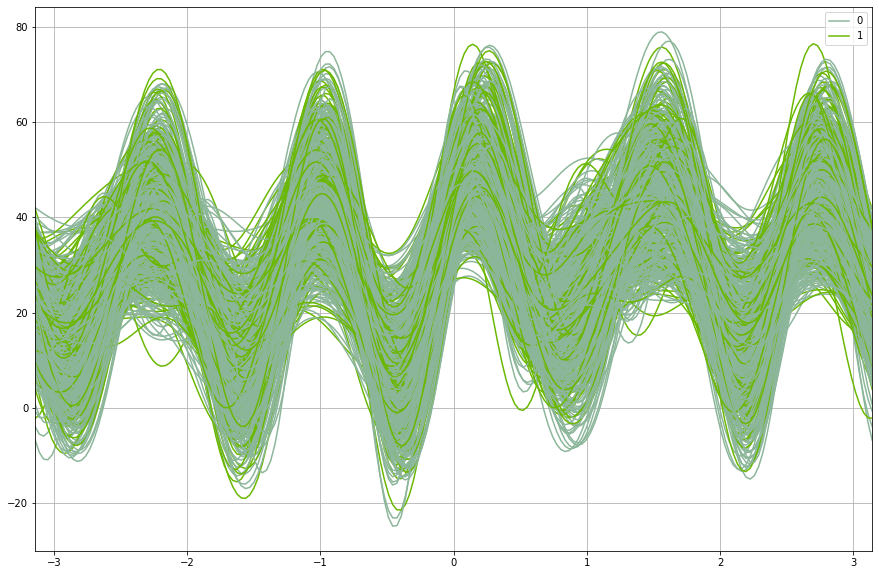

In [37]:
from pandas.plotting import andrews_curves
andrews_curves(new_df, "y")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001503F53C4C8>,
      dtype=object)

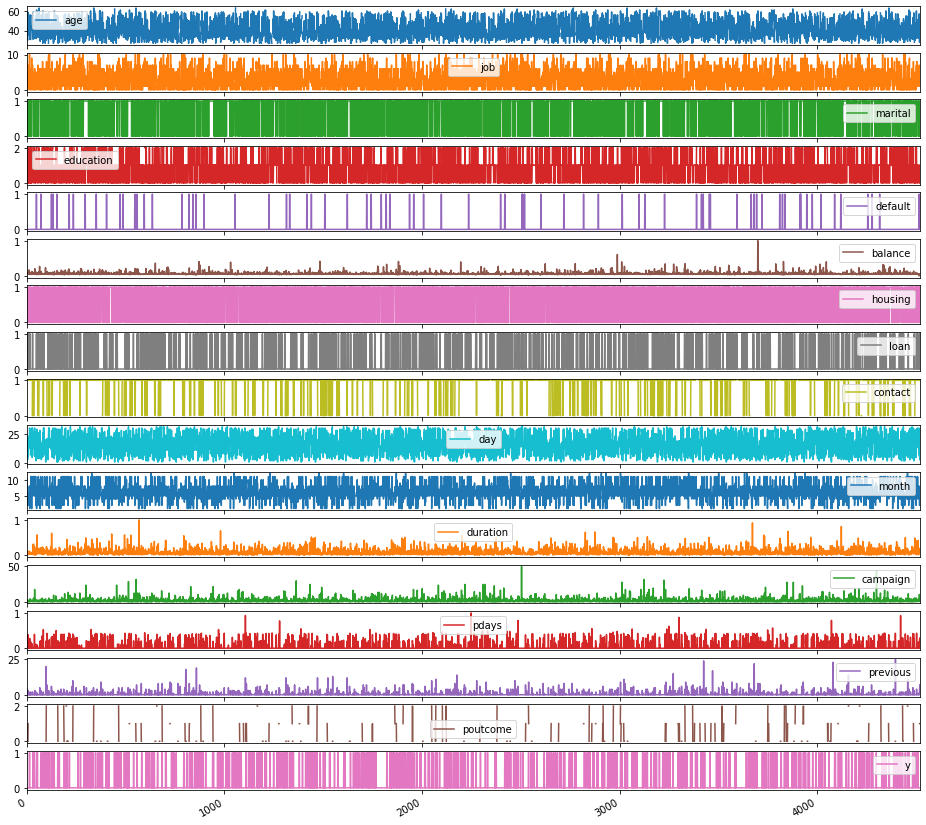

In [38]:
new_df.plot(subplots = True, figsize =(16,16))

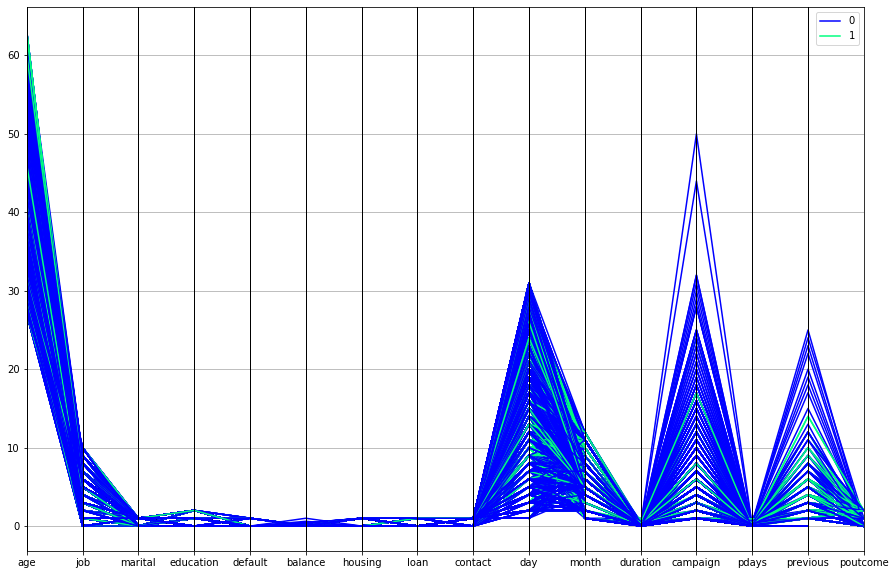

In [39]:
pd.plotting.parallel_coordinates(new_df, "y", colormap = "winter")
plt.show()

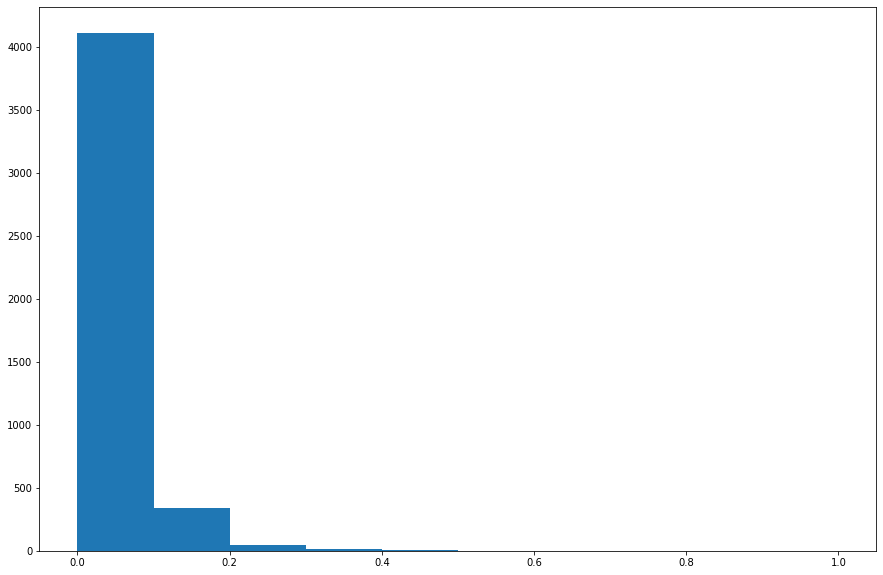

In [40]:
plt.hist(new_df.balance.values)
plt.show()

In [41]:
new_df.y.unique()

array([0, 1], dtype=int64)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015038F21D08>,
      dtype=object)

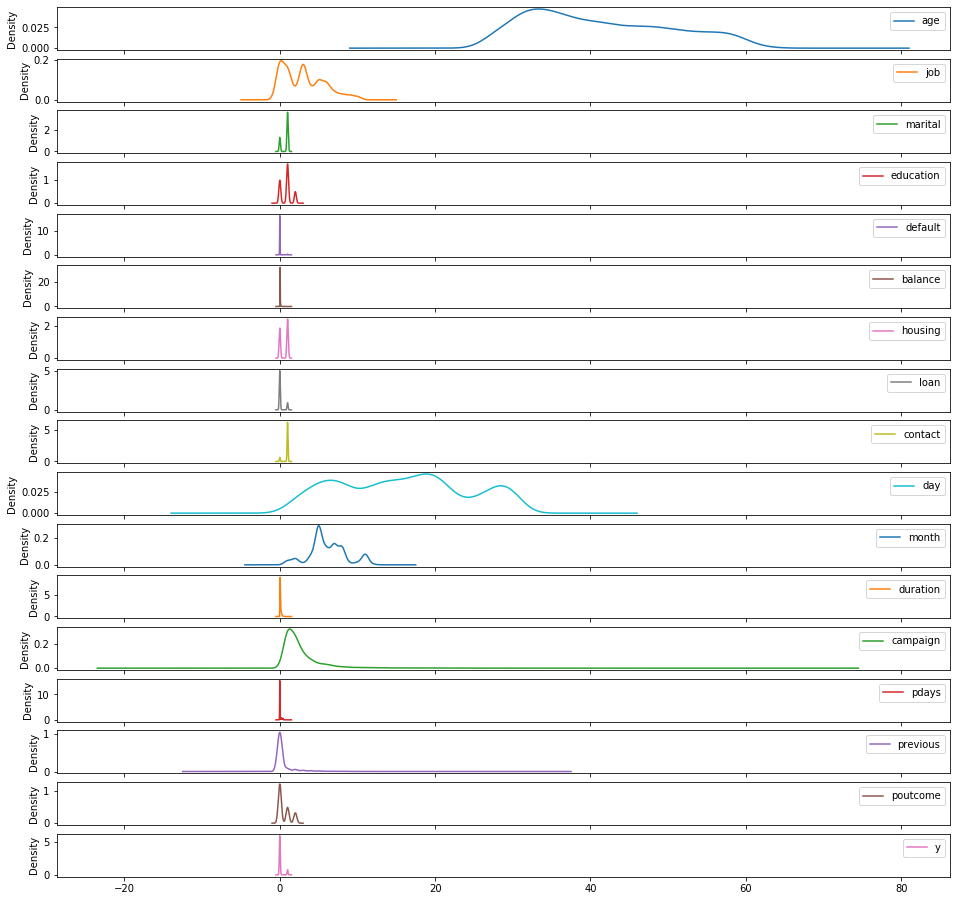

In [42]:
new_df.plot.kde(subplots = True , figsize =(16,16))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000150386E9808>,
      dtype=object)

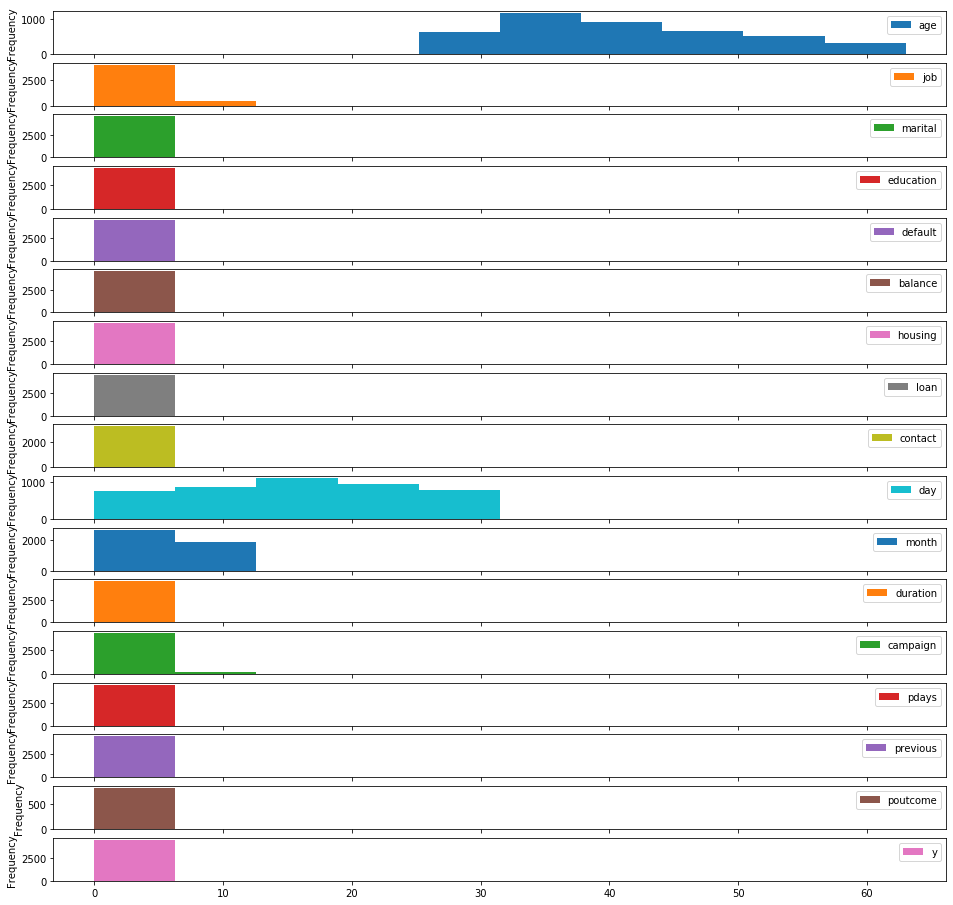

In [43]:
new_df.plot.hist(subplots = True , figsize =(16,16))